# A detailed analysis into Data Science Salaries using Python

### Problem Statement

Data is the new oil. Starting out on a career in Data Science was exciting, but left me with a load of questions. Apart from the job sections involved in the rather broad Data Science, I wanted to find out what regions of the world had the most demand for data scientists, leading to a higher compensation, or pay. What would be the difference between working as a data analyst for a small, medium or large firm and how much does these affect your pay/growth?

### Business Questions

- What are the top 10 popular roles in data science?
- What are the top 10 data science roles based on average salary?
- What are the effect of experience level, employment type, remote ratio and company size on average salary?
- What are the top 10 popular roles in data science in the United States?
- What are the top 10 data science roles based on average salary in the United States?
- What are the top 10 popular roles in data science in other countries?
- What are the top 10 data science roles based on average salary in other countries?
- What are the trends of salaries over the period?
- What are the trends of salaries over the period in the United States and in other countries?
- What is the difference between salaries in the United States and in other countries?

### Explanatory information about the dataset

- work_year: The year the salary was paid
- experience_level: The experience level in the job during the year with the following possible values: EN: Entry-level / Junior, MI: Mid-level / Intermediate, SE: Senior-level / Expert, EX: Executive-level / Director
- employment_type: The type of employment for the role which could be, PT: Part-time, FT: Full-time, CT: Contract or FL: Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
- employee_residence: Employee’s primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%), 50 Partially remote 100 & Fully remote (more than 80%).
- company_location: The country of the employer’s main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year: ‘S’ less than 50 employees (small), ‘M’ 50 to 250 employees (medium)& ‘ L’ more than 250 employees (large).

### Importing the necessary libraries for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy.stats import stats 
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset in the kernel

In [2]:
data = pd.read_csv("ds_salaries.csv")

### Making a copy of the dataset

In [3]:
ds_copy = data.copy()

## Data Cleaning

### Checking the shape of the dataset

In [4]:
data.shape

(607, 12)

### Checking the size of the dataset

In [5]:
data.size

7284

### Checking the columns available in the dataset

In [6]:
data.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

### Generating information on the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


### Checking the first five rows of the dataset

In [8]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


### Checking the last five rows of the dataset

In [9]:
data.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


### Checking for duplicates in the dataset

In [10]:
data[data.duplicated()]

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


### Suming duplicates in the dataset

In [11]:
data.duplicated().sum()

0

### Placing the dataset into a dataframe

In [12]:
df = pd.DataFrame(data)

### Converting data types of columns to aid in data analysis

In [13]:
# Converting 'object' to 'category'
for col in df:
    if df[col].dtypes=='object':
        df[col] = df[col].astype('category')

In [14]:
df["remote_ratio"] = df["remote_ratio"].astype("category")

In [15]:
df["work_year"] = df["work_year"].astype("str")

### Checking if changes have been affected

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Unnamed: 0          607 non-null    int64   
 1   work_year           607 non-null    object  
 2   experience_level    607 non-null    category
 3   employment_type     607 non-null    category
 4   job_title           607 non-null    category
 5   salary              607 non-null    int64   
 6   salary_currency     607 non-null    category
 7   salary_in_usd       607 non-null    int64   
 8   employee_residence  607 non-null    category
 9   remote_ratio        607 non-null    category
 10  company_location    607 non-null    category
 11  company_size        607 non-null    category
dtypes: category(8), int64(3), object(1)
memory usage: 57.0+ KB


### Dropping a column in the dataset

In [17]:
df.drop("Unnamed: 0", axis = 1)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Checking the counts for each year

In [18]:
df["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

### Replacing the values in the various columns

In [19]:
exp_lvl_map = {'EN': 'Entry level', 'EX': 'Executive level', 'MI': 'Mid level', 'SE': 'Senior level'}
emp_type_map = {'FT': 'Full-time', 'PT': 'Part-time', 'CT': 'Contract', 'FL': 'Freelance'}
emp_res_map = {
    'DE': 'Germany', 'GR': 'Greece', 'RU': 'Russia', 'US': 'United States', 'FR': 'France',
    'AT': 'Austria', 'CA': 'Canada', 'UA': 'Ukraine', 'NG': 'Nigeria', 'PK': 'Pakistan',
    'IN': 'India', 'GB': 'UK', 'ES': 'Spain', 'IT': 'Italy', 'PL': 'Poland',
    'BG': 'Bulgaria', 'PH': 'Philippines', 'PT': 'Portugal', 'HU': 'Hungary', 'SG': 'Singapore',
    'BR': 'Brazil', 'MX': 'Mexico', 'TR': 'Turkey', 'NL': 'Netherlands', 'AE': 'UAE',
    'JP': 'Japan', 'JE': 'Jersey', 'PR': 'Puerto Rico', 'RS': 'Serbia', 'KE': 'Kenya',
    'CO': 'Colombia', 'NZ': 'New Zealand', 'VN': 'Vietnam', 'IR': 'Iran', 'RO': 'Romania',
    'CL': 'Chile', 'BE': 'Belgium', 'DK': 'Denmark', 'CN': 'China', 'HK': 'Hong Kong',
    'SI': 'Slovenia', 'MD': 'Moldova', 'LU': 'Luxembourg', 'HR': 'Croatia', 'MT': 'Malta'
}
comp_loc_map = dict(emp_res_map, CH='Switzerland', AS='American Samoa', IL='Israel')
comp_size_map = {'L': 'Large', 'M': 'Medium', 'S': 'Small'}

### Mapping the replaced values to their respective columns

In [20]:
def map_dataframe_values(df, mappings):
    for column, mapping in mappings.items():
        df[column] = df[column].map(mapping)

mappings = {
    'experience_level': exp_lvl_map,
    'employment_type': emp_type_map,
    'employee_residence': emp_res_map,
    'company_location': comp_loc_map,
    'company_size': comp_size_map
}

map_dataframe_values(df, mappings)

In [21]:
df['remote_ratio'] = np.where(df['remote_ratio'] == 0, 'No Remote', np.where(df['remote_ratio'] == 50, 'Part-time Remote', 'Full-time Remote'))

### Checking summary statistics of the dataset

In [22]:
data.describe()

,Unnamed: 0,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,303.000000,3.240001e+05,112297.869852
std,175.370085,1.544357e+06,70957.259411
min,0.000000,4.000000e+03,2859.000000
25%,151.500000,7.000000e+04,62726.000000
50%,303.000000,1.150000e+05,101570.000000
75%,454.500000,1.650000e+05,150000.000000
max,606.000000,3.040000e+07,600000.000000


## Data Analysis

### Distribution of numerical columns in the dataset

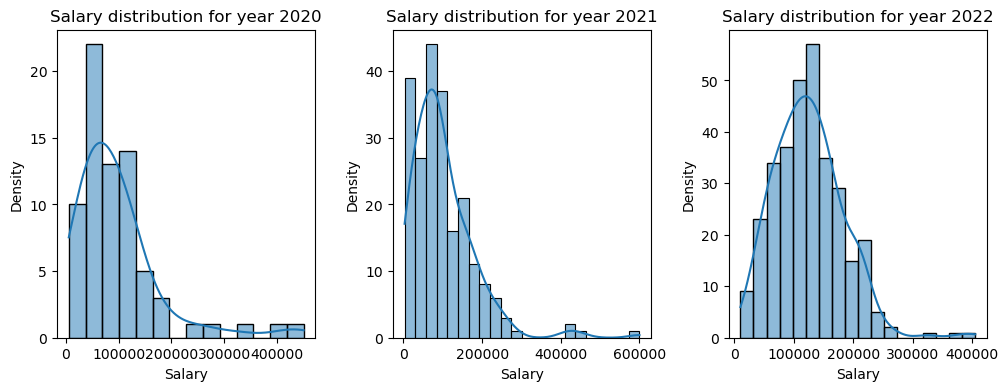

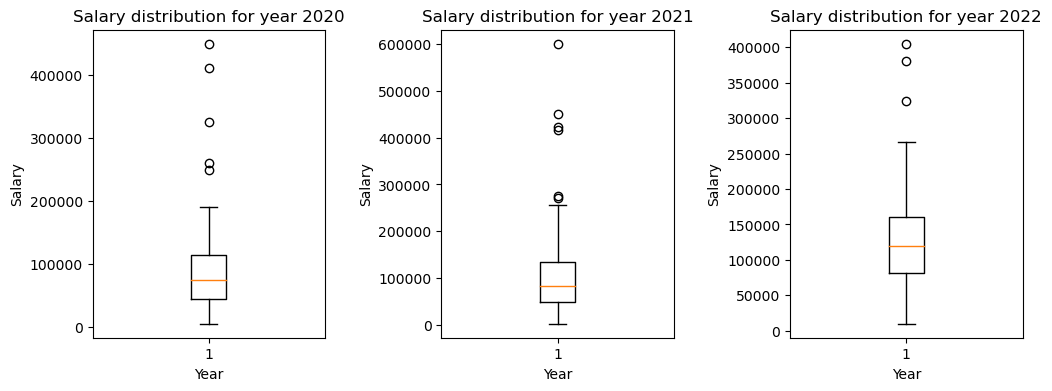

In [23]:
def plot_salary_distribution(df):
    fig, axs = plt.subplots(1, 3, figsize=(12,4))
    
    # plot a histogram for each year
    for i, year in enumerate(df['work_year'].unique()):
        ax = axs[i]
        sns.histplot(df[df['work_year']==year], x='salary_in_usd', kde=True, ax=ax)
        ax.set_title(f'Salary distribution for year {year}')
        ax.set_xlabel('Salary')
        ax.set_ylabel('Density')
    
    # adjust subplot spacing
    plt.subplots_adjust(wspace=0.3)
    
    # display the plot
    plt.show()
    
    
def plot_salary_boxplot(df):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # plot a boxplot for each year
    for i, year in enumerate(df['work_year'].unique()):
        ax = axs[i]
        ax.boxplot(df[df['work_year']==year]['salary_in_usd'])
        ax.set_title(f'Salary distribution for year {year}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Salary')

    # adjust subplot spacing
    plt.subplots_adjust(wspace=0.5)

    # display the plot
    plt.show()
    
plot_salary_distribution(df)
plot_salary_boxplot(df)

The following observations were made from the numerical distribution of the Salary column based on each year:

- The Distribution of Salary based on each year are extremely right skewed.
- The Distribution of Salary based on each year unimodal in nature.

### Finding the percentage of jobs based on the remote ratio

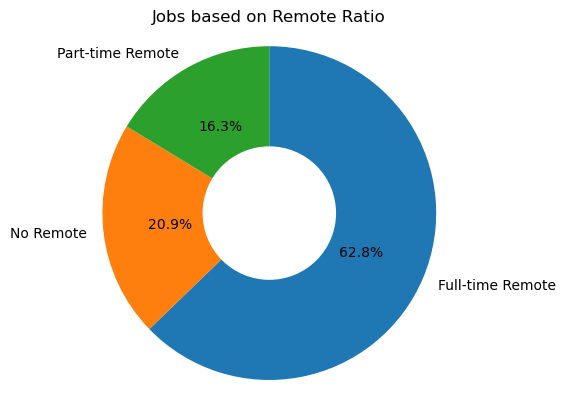

In [24]:
def create_donut_chart(df, column):
    
    # Group the data by the values in the specified column
    data = df.groupby('remote_ratio').size()
    
    # Create the donut chart
    fig, ax2 = plt.subplots()
    ax2.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    ax2.axis('equal')
    circle = plt.Circle((0,0), 0.4, fc='white')
    fig.gca().add_artist(circle)
    ax2.set_title('Jobs based on Remote Ratio')
    plt.show()

    
create_donut_chart(df, 'remote_ratio')

The donut chart shows that, more than 50% of data science jobs are Full-time Remote, more than 20% are No Remote and more than 16% are Part-time Remote.

### Finding the highest earners of jobs in each year

In [25]:
def highest_earner_all_professions(df, year):
    highearner = df[df.work_year == year]
    highearner = highearner.groupby(['job_title', 'experience_level', 'company_size', 'company_location']).max()['salary_in_usd'].reset_index()
    highearner = highearner.sort_values('salary_in_usd', ascending=False).head(10)
    return highearner

### 2020

In [26]:
highest_earner_all_professions(df, '2020')

,job_title,experience_level,company_size,company_location,salary_in_usd
13431,Research Scientist,Mid level,Medium,United States,450000.0
6301,Data Scientist,Senior level,Large,United States,412000.0
6991,Director of Data Science,Executive level,Large,United States,325000.0
11580,Machine Learning Scientist,Senior level,Small,Japan,260000.0
10510,Machine Learning Engineer,Entry level,Large,United States,250000.0
6048,Data Science Manager,Senior level,Medium,United States,190200.0
9659,Lead Data Scientist,Senior level,Small,United States,190000.0
4921,Data Engineer,Senior level,Large,United States,188000.0
10717,Machine Learning Engineer,Senior level,Large,United States,150000.0
12932,Principal Data Scientist,Senior level,Medium,Germany,148261.0


The table above shows the top 10 data science roles that earned the highest salaries in the year 2020. The Research Scientist, Data Scientist and Director of Data Science are the roles that earned the most among the top 10.

### 2021

In [27]:
highest_earner_all_professions(df, '2021')

,job_title,experience_level,company_size,company_location,salary_in_usd
20670,Principal Data Engineer,Executive level,Large,United States,600000.0
13032,Financial Data Analyst,Mid level,Large,United States,450000.0
2088,Applied Machine Learning Scientist,Mid level,Large,United States,423000.0
21202,Principal Data Scientist,Executive level,Small,United States,416000.0
15426,Lead Data Engineer,Senior level,Large,United States,276000.0
16680,ML Engineer,Mid level,Large,United States,270000.0
16870,ML Engineer,Senior level,Small,United States,256000.0
11550,Director of Data Science,Executive level,Large,United States,250000.0
9954,Data Science Manager,Senior level,Large,United States,240000.0
21354,Principal Data Scientist,Senior level,Large,United States,235000.0


The table above shows the top 10 data science roles that earned the highest salaries in the year 2021. The Principal Data Engineer, Financial Data Analyst and Applied Machine Learning Scientist are the roles that earned the most among the top 10.

### 2022

In [28]:
highest_earner_all_professions(df, '2022')

,job_title,experience_level,company_size,company_location,salary_in_usd
3025,Data Analytics Lead,Senior level,Large,United States,405000.0
781,Applied Data Scientist,Senior level,Large,United States,380000.0
3552,Data Engineer,Executive level,Medium,United States,324000.0
3450,Data Architect,Senior level,Medium,United States,266400.0
4674,Data Scientist,Senior level,Medium,United States,260000.0
3654,Data Engineer,Senior level,Medium,United States,243900.0
4419,Data Science Manager,Mid level,Medium,United States,241000.0
6204,Head of Data Science,Executive level,Medium,United States,224000.0
7938,Machine Learning Engineer,Senior level,Medium,United States,220000.0
4657,Data Scientist,Senior level,Large,United States,215300.0


The table above shows the top 10 data science roles that earned the highest salaries in the year 2022. The Data Analytics Lead, Applied Data Scientist and Data Engineer are the roles that earned the most among the top 10.

### Top 10 popular roles in Data Science

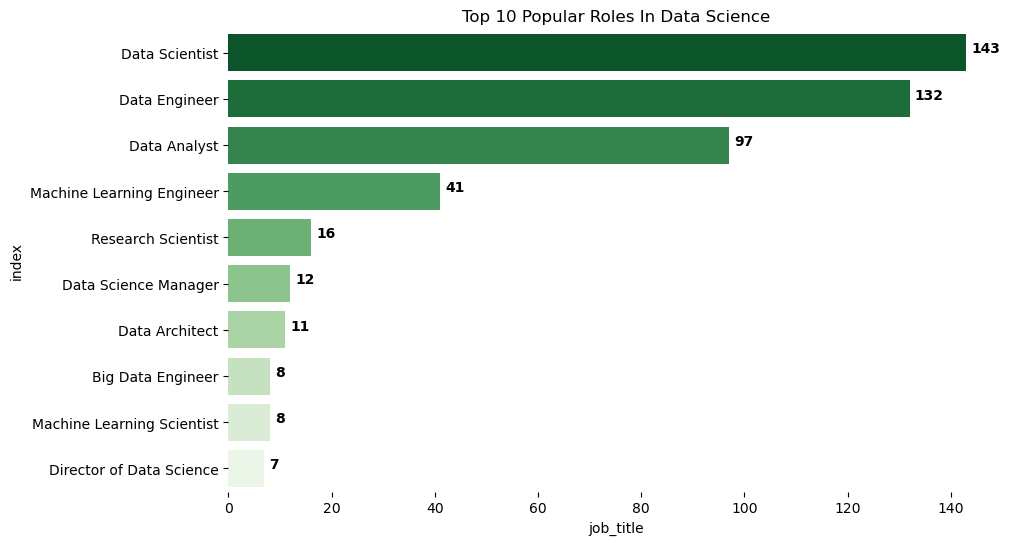

In [29]:
def plot_top_10_jobs(group_by_column, palette, title, data):
    top_10_jobs = data['job_title'].value_counts().nlargest(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x='job_title', y='index', data=top_10_jobs, order=top_10_jobs.sort_values('job_title', ascending=False)['index'], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    for index, value in enumerate(top_10_jobs['job_title']):
        plt.text(value+1, index, str(value), color='black', fontweight='bold')
        sns.despine(left=True, bottom=True)
    plt.show()

plot_top_10_jobs("job_title", "Greens_r", "Top 10 Popular Roles In Data Science", df)

The chart above shows the top 10 popular roles in the data science space with Data Scientist, Data Engineer, Data Analyst, Machine Learning Engineer, Research Scientist and other roles being more popular.

### Top 10 roles in data science based on average salary

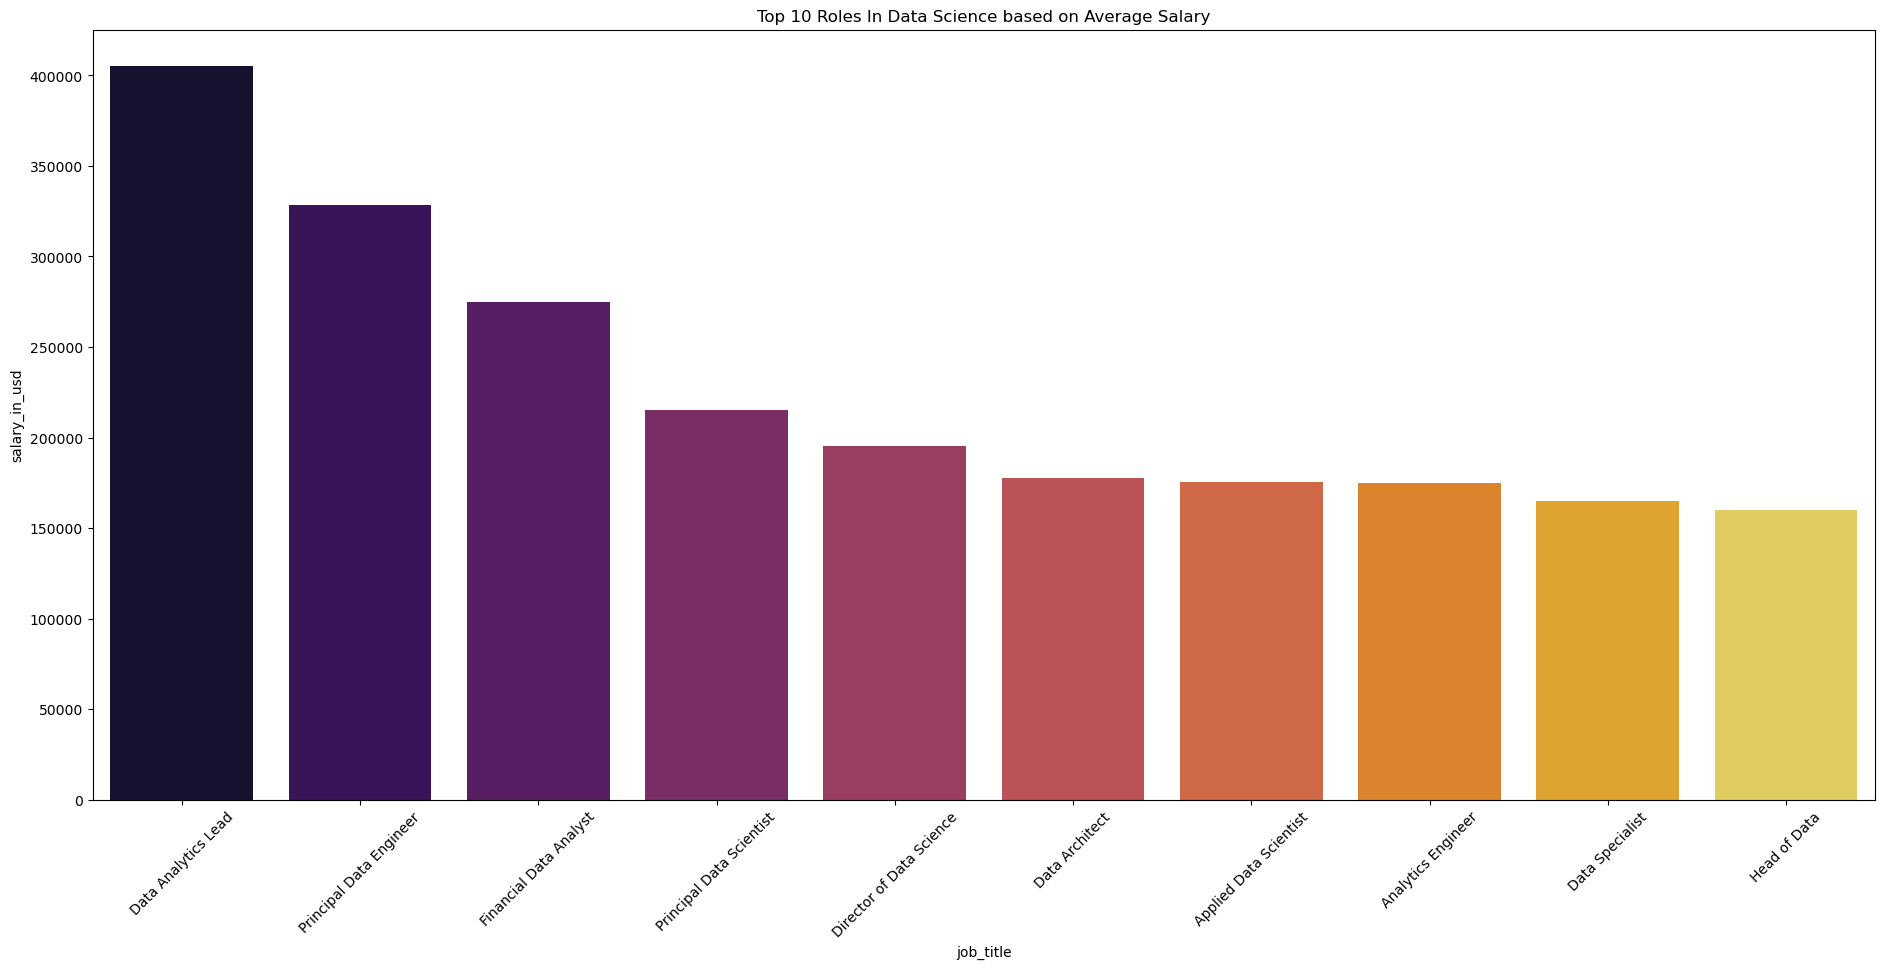

In [30]:
def plot_top_10_jobs(column_name, group_by_column, palette, title, data):
    top_10_jobs = data.groupby(group_by_column)[column_name].mean().nlargest(10).reset_index()
    plt.figure(figsize = (23,10))
    sns.barplot(x=group_by_column, y=column_name, data=top_10_jobs, order=top_10_jobs.sort_values(column_name, ascending=False)[group_by_column], palette=palette)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

plot_top_10_jobs("salary_in_usd", "job_title", "inferno", "Top 10 Roles In Data Science based on Average Salary", df)

The chart above shows the top 10 roles in data science based on average salary. Data Analytics Lead, Principal Data Engineer, Financial Data Analyst, Principal Data Scientist, Director of Data Science and the rest of the roles in the chart are the roles with the highest average salary.

### Average salary based on columns in the dataset

In [31]:
def plot_avg_salary(df, groupby_column):
    exp = df.groupby(groupby_column).mean()['salary_in_usd'].reset_index()
    exp = exp.sort_values('salary_in_usd', ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=groupby_column, y='salary_in_usd', data=exp, palette='Blues_r')
    plt.xlabel(groupby_column)
    plt.ylabel('Average Salary in USD')
    plt.title('Average Salary by ' + groupby_column)
    plt.xticks(rotation=0)
    plt.show()

### Finding average salary based on experience level

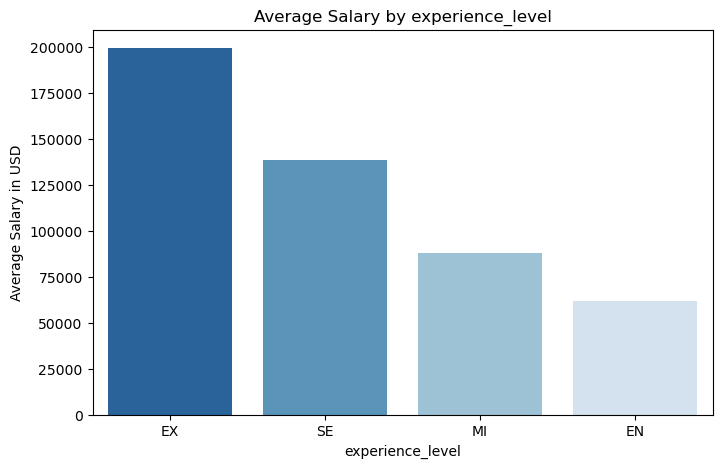

In [32]:
plot_avg_salary(data, 'experience_level')

The chart above shows the average salary based on experience level. From the four experience levels, the Executive Level has the highest average salary, followed by Senior Level and Mid Level. Entry level has the least average salary.

### Finding average salary based on remote ratio

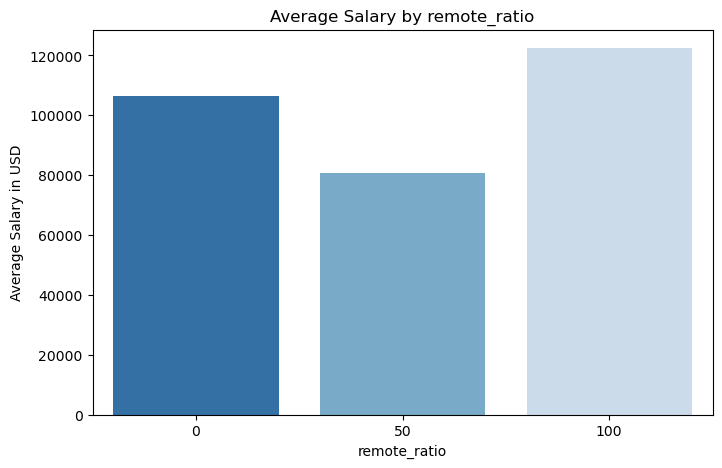

In [33]:
plot_avg_salary(data, 'remote_ratio')

The chart above depicts that Full-time Remote has the highest average salary compared to No Remote and Part-time Remote having the lowest.

### Finding the average salary based on employment type

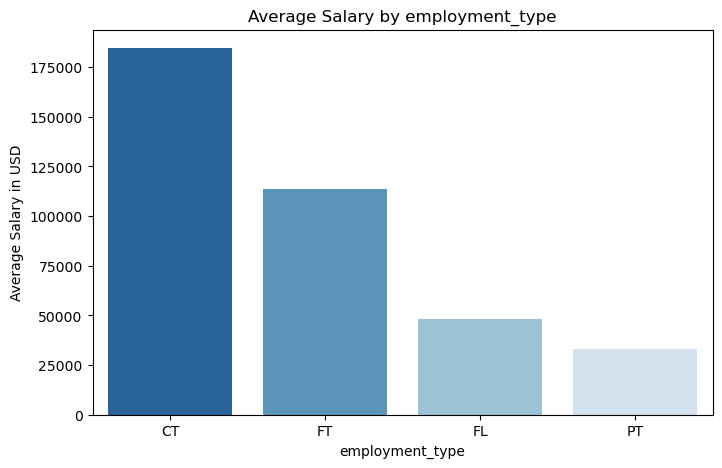

In [34]:
plot_avg_salary(data, 'employment_type')

For average salary based on employment type, Contract has the highest average salary, followed by Full-time which is reasonably lesser than Contract. Part-time is the least with Freelance being higher than Part-time.

### Average Salary by Company Size

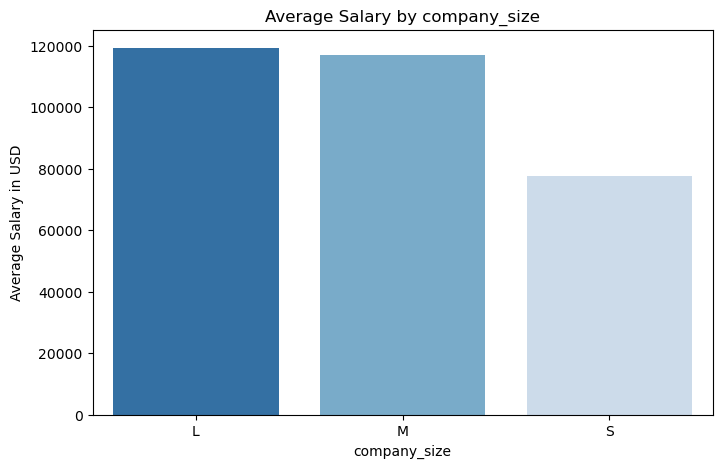

In [35]:
plot_avg_salary(data, 'company_size')

From the chart, the Large companies made more average salaries, the Medium coompanies made lesser than the Large companies and the Small companies made the least.

### Finding the Top 10 company locations in data science

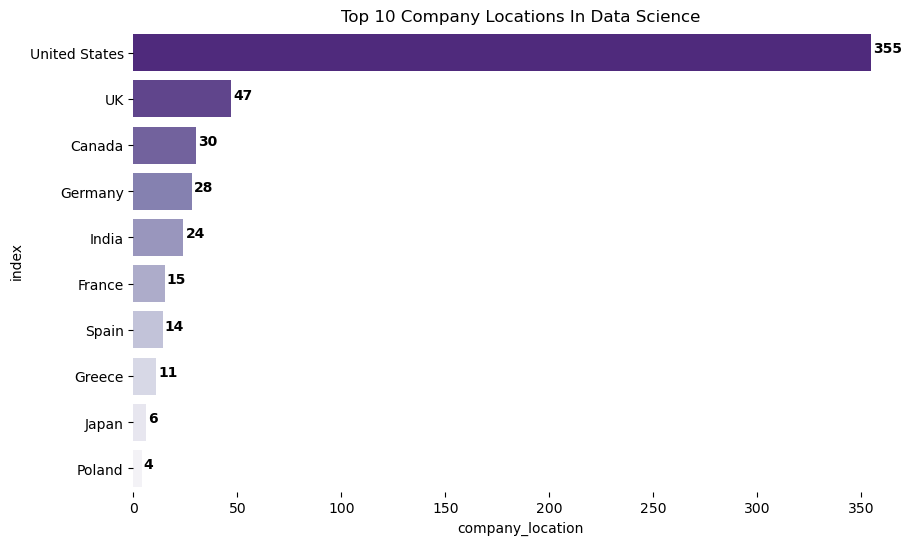

In [36]:
def plot_top_10_locations(group_by_column, palette, title, data):
    top_10_locations = data[group_by_column].value_counts().nlargest(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x=group_by_column, y='index', data=top_10_locations, order=top_10_locations.sort_values(group_by_column, ascending=False)['index'], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    for index, value in enumerate(top_10_locations[group_by_column]):
        plt.text(value+1, index, str(value), color='black', fontweight='bold')
        sns.despine(left=True, bottom=True)
    plt.show()

plot_top_10_locations("company_location", "Purples_r", "Top 10 Company Locations In Data Science", df)


The chart above depicts that the top 10 company locations one will find a lot of data science roles. The United States is one location that a lot of data science roles can be found. The United Kingdom, Canada, Germany, India and the rest have a number of roles in data science.

### Finding top 10 company locations with the highest average salaries

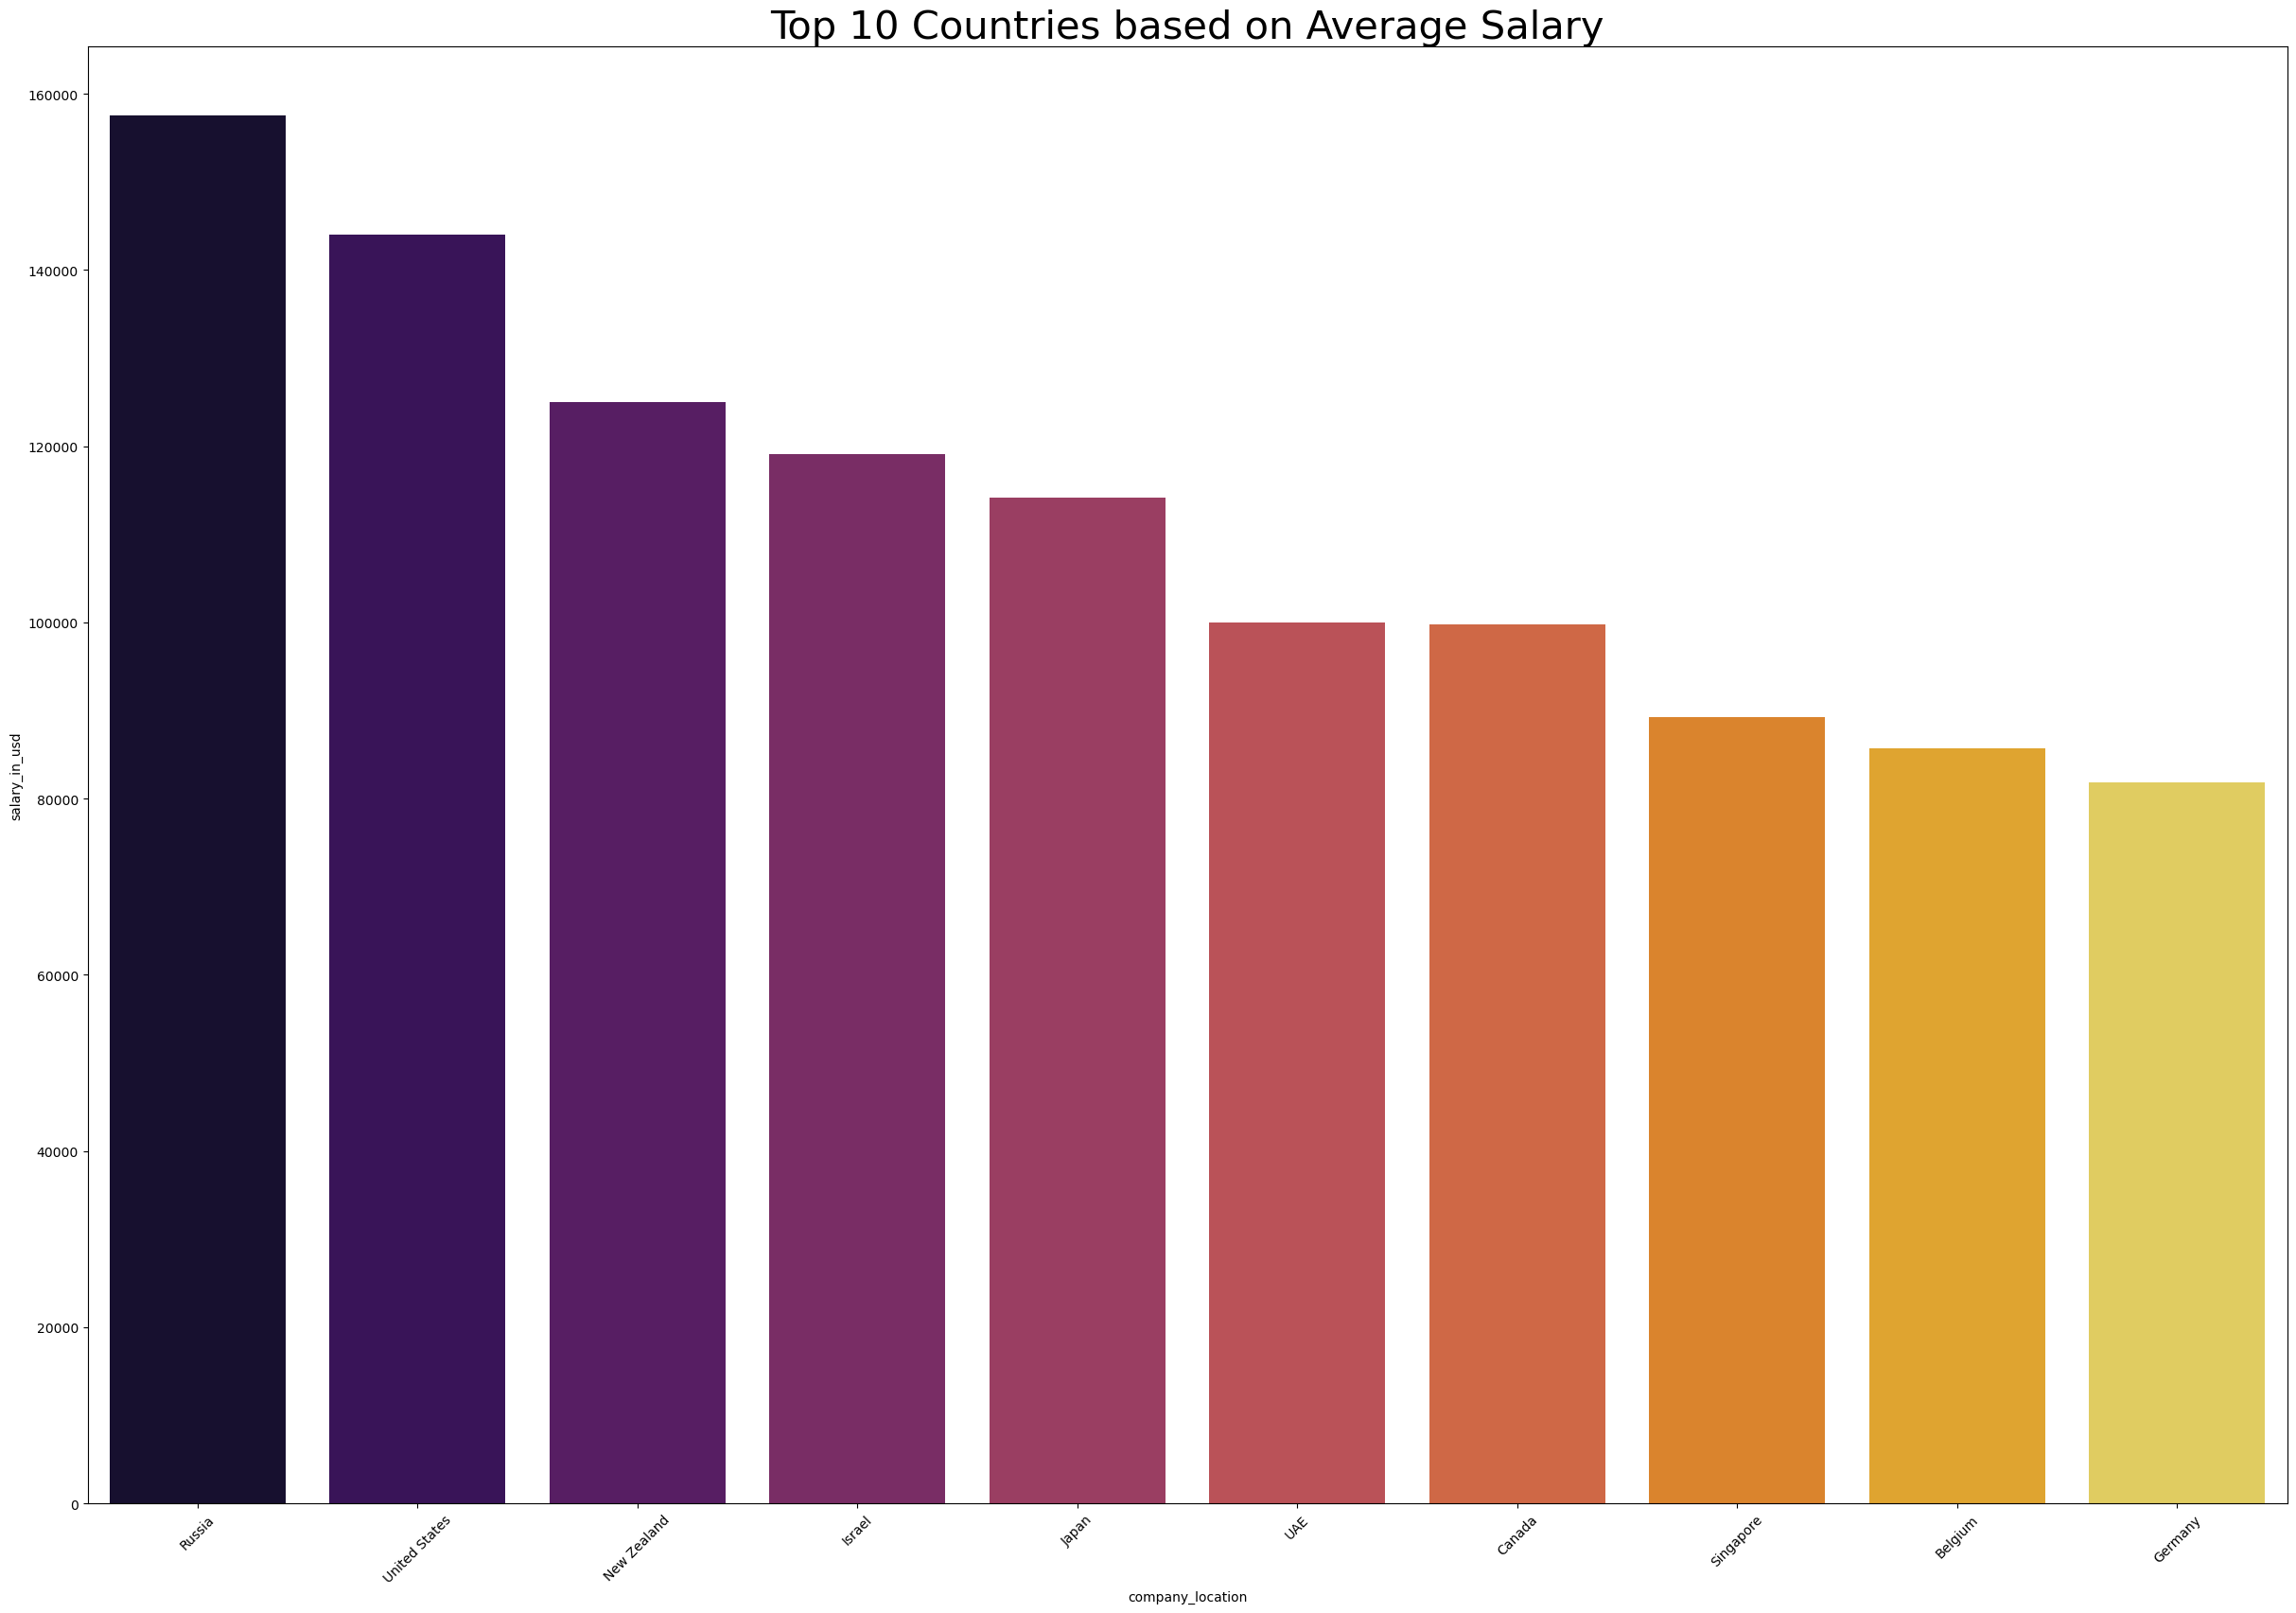

In [37]:
def plot_top_10_countries(column_name, group_by_column, palette, title, data):
    top_10_countries = data.groupby(group_by_column)[column_name].mean().nlargest(10).reset_index()
    plt.figure(figsize=(30,20))
    sns.barplot(x=group_by_column, y=column_name, data=top_10_countries, order=top_10_countries.sort_values(column_name, ascending=False)[group_by_column], palette=palette)
    plt.xticks(rotation=45)
    plt.title(title, fontsize = 30)
    plt.show()

plot_top_10_countries("salary_in_usd", "company_location", "inferno", "Top 10 Countries based on Average Salary", df)

The chart above depicts the top 10 company locations that have the highest average salaries. Russia has the highest, followed by United States, New Zealand, Israel, Japan and the rest of the company locations.

### Trend of salaries over the years

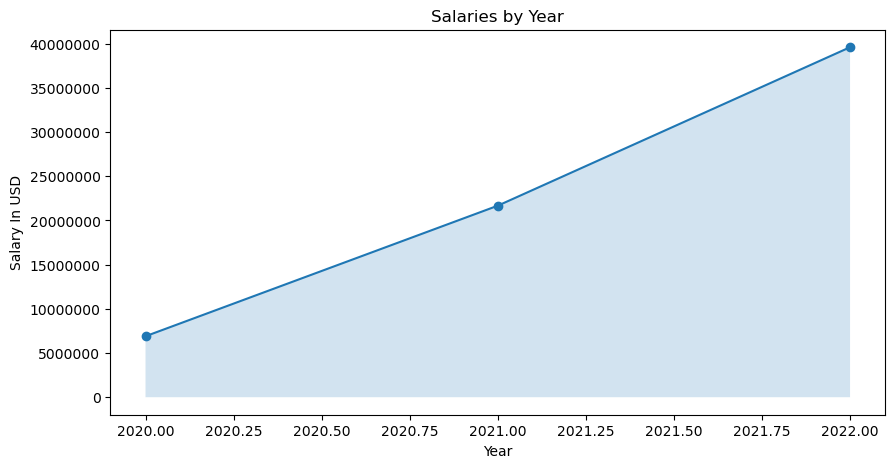

In [38]:
def plot_salary_by_year(df):
    salary_by_year = df.groupby('work_year')['salary_in_usd'].sum()
    years = df['work_year'].unique()
    plt.figure(figsize = (10,5))
    plt.fill_between(years, salary_by_year, alpha=0.2)
    plt.plot(years, salary_by_year, marker='o', label='salary_in_usd')
    plt.xlabel('Year')
    plt.ylabel('Salary In USD')
    plt.title('Salaries by Year')
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.show()

plot_salary_by_year(data)

The chart above depicts the trend of salaries by year in other countries. In 2020 to 2021, salaries increased from above USD 5,000,000 to above USD 15,000,000. From 2021 to 2022, salaries slowly decreases from above USD 15,000,000 to above USD 35,000,000.

### Creating a dataframe with company location being United States

In [39]:
US = df[df['company_location'] == 'United States']

### Creating a dataframe with all company locations except the United States

In [40]:
Other = df[df['company_location'] != 'United States']

### Top 10 Popular Roles In Data Science In  The United States

In [41]:
def plot_top_10_jobs_us(group_by_column, palette, title, data):
    top_10_jobs_us = US['job_title'].value_counts().nlargest(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x='job_title', y='index', data=top_10_jobs_us, order=top_10_jobs_us.sort_values('job_title', ascending=False)['index'], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    for index, value in enumerate(top_10_jobs_us['job_title']):
        plt.text(value+1, index, str(value), color='black', fontweight='bold')
        sns.despine(left=True, bottom=True)
    plt.show()

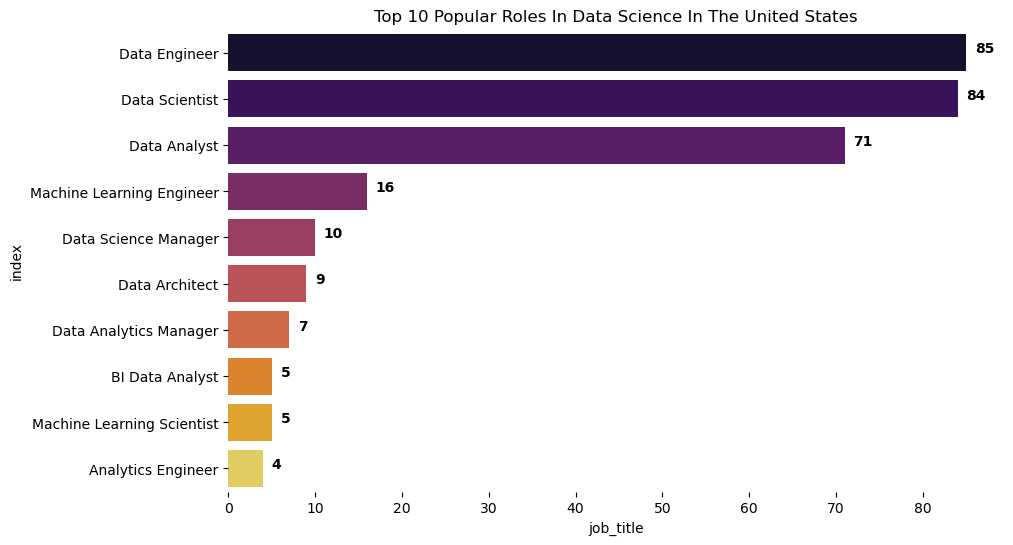

In [42]:
plot_top_10_jobs_us("job_title", "inferno", "Top 10 Popular Roles In Data Science In The United States", US)

The chart above depicts top 10 popular roles in data science in the United States.The Data Engineer, Data Scientist, Data Analyst are more popular in the United States. There are other popular roles in the United States as shown above.

### Top 10 Data Science Roles based on Average Salaries in the United States

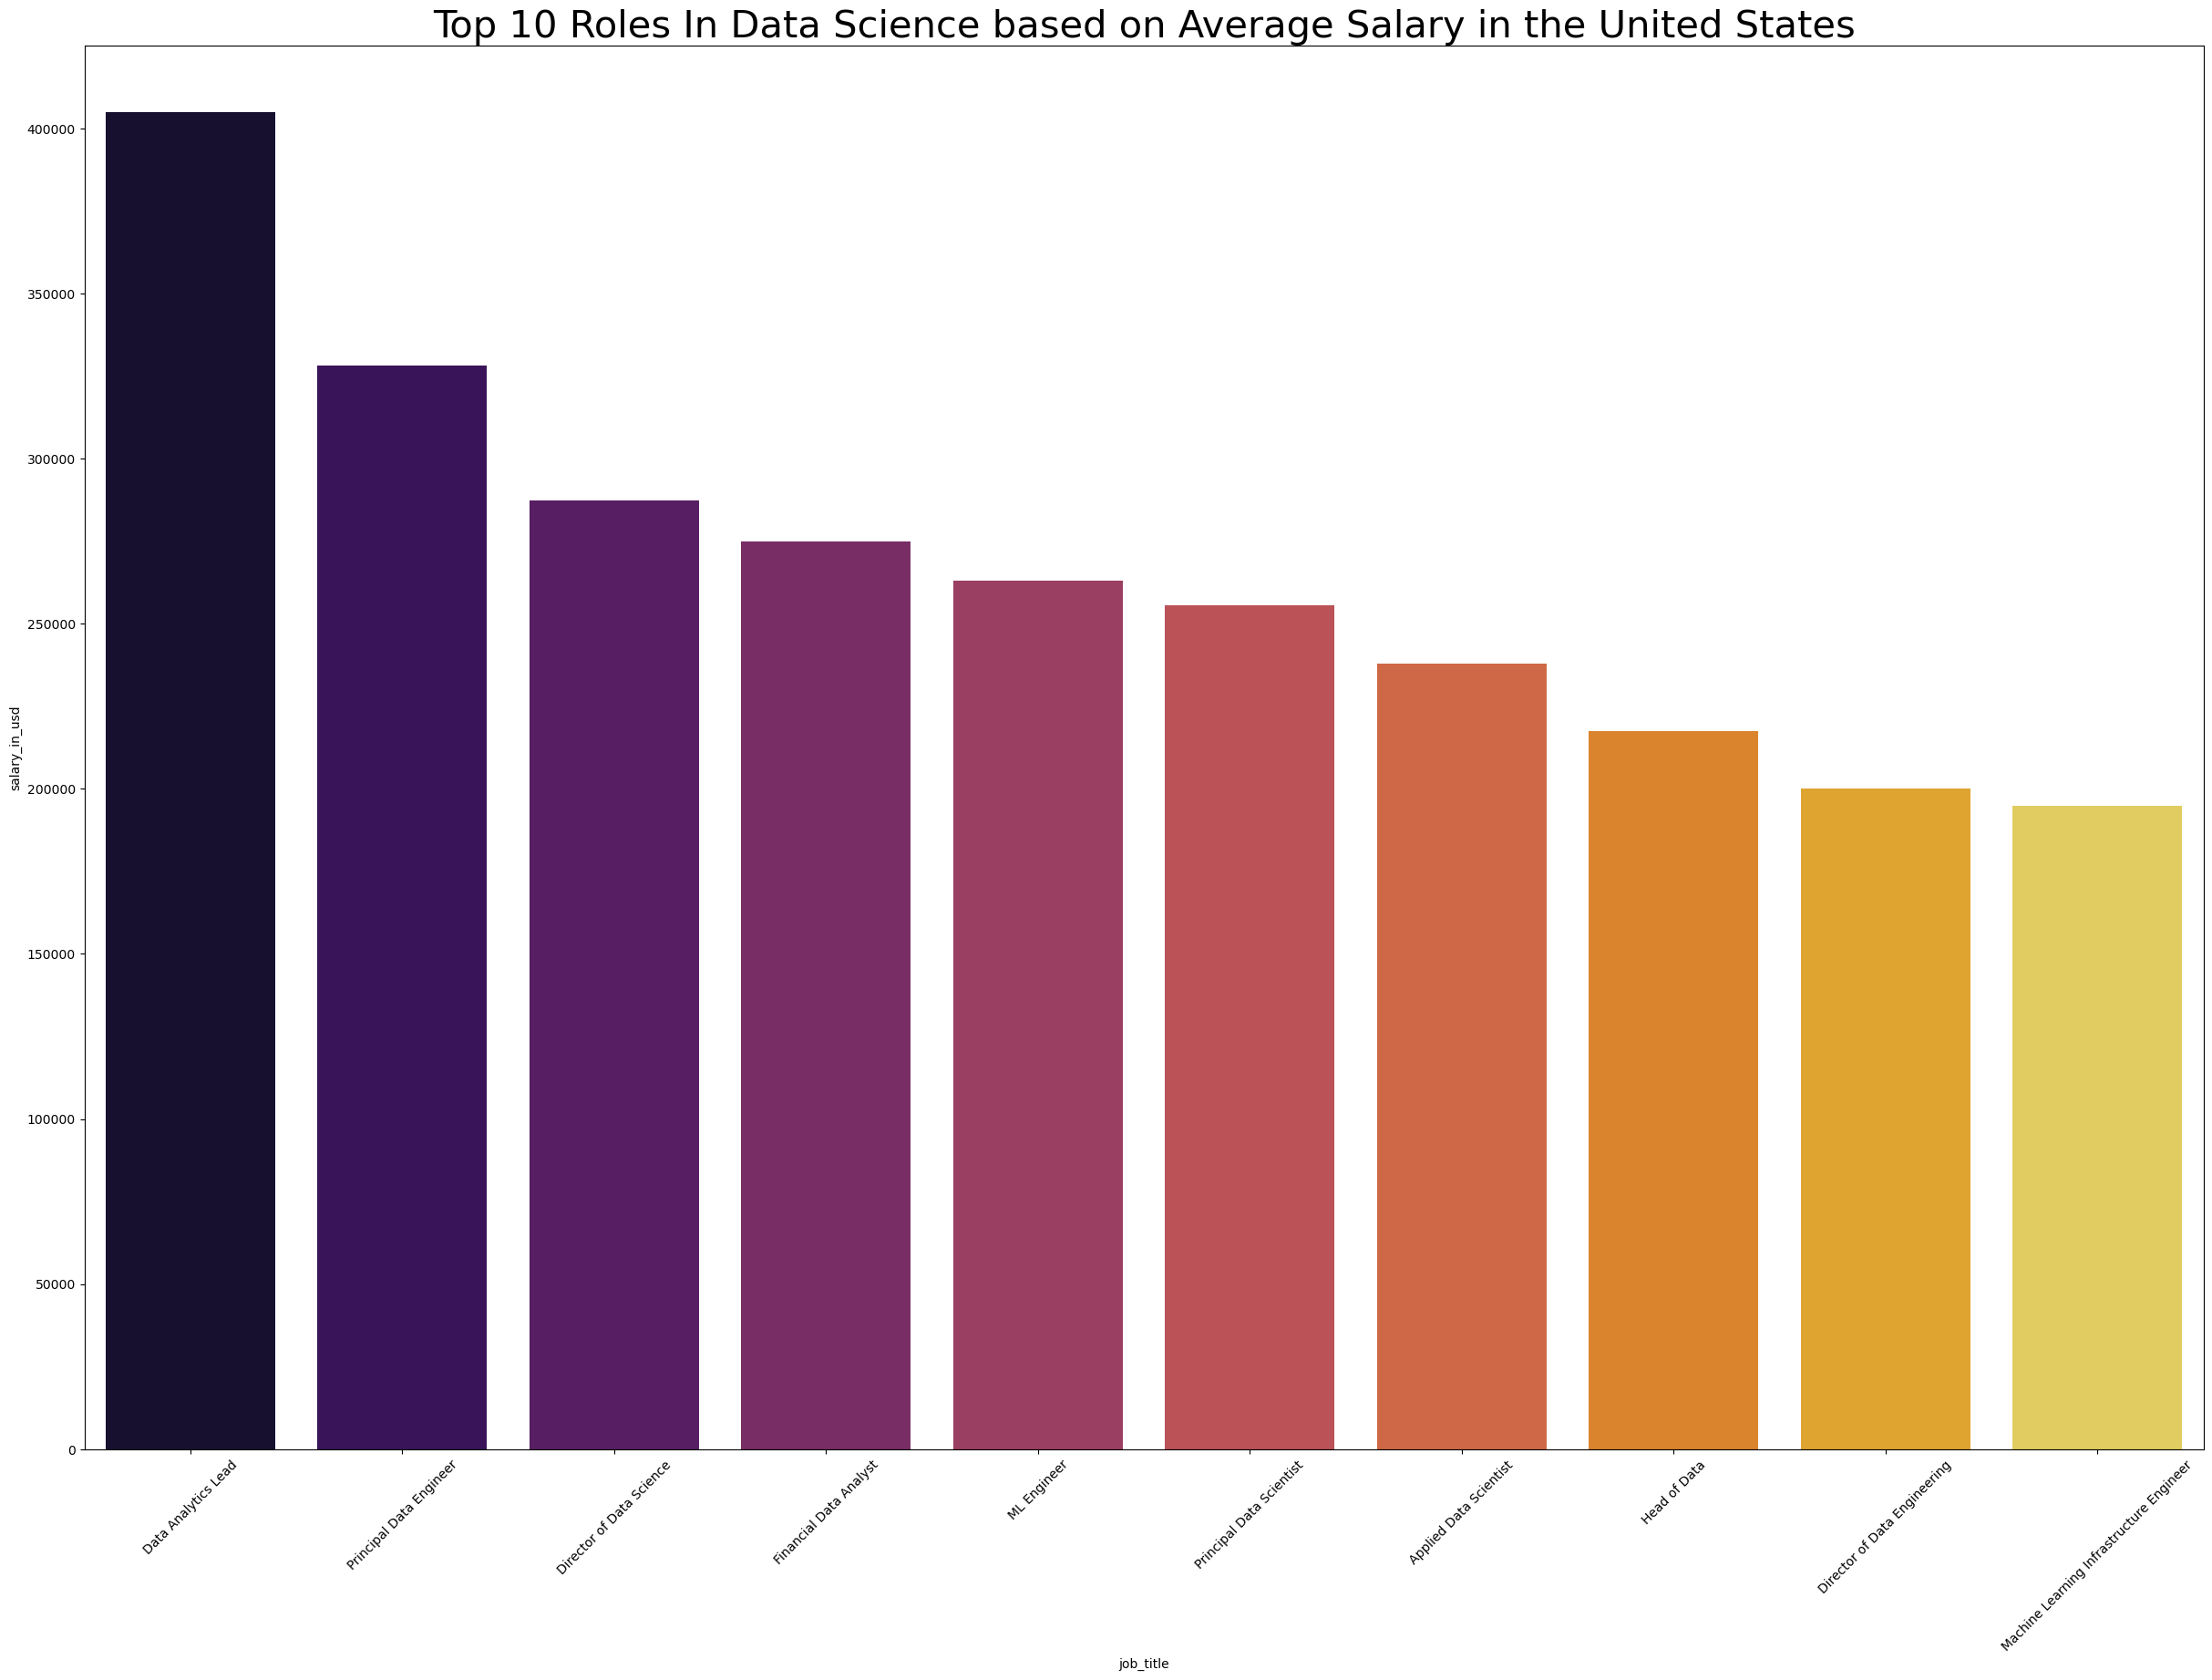

In [43]:
def plot_top_10_salary(column_name, group_by_column, palette, title, data):
    top_10_salary = data.groupby(group_by_column)[column_name].mean().nlargest(10).reset_index()
    plt.figure(figsize = (30,20))
    sns.barplot(x=group_by_column, y=column_name, data=top_10_salary, order=top_10_salary.sort_values(column_name, ascending=False)[group_by_column], palette=palette)
    plt.xticks(rotation=45)
    plt.title(title, fontsize = 30)
    plt.show()

plot_top_10_salary("salary_in_usd", "job_title", "inferno", "Top 10 Roles In Data Science based on Average Salary in the United States", US)

The chart above shows top 10 data science roles based on average salaries in the United States. We found out that, Data Analytics Lead, Principal Data Engineer, Director of Data Science and other data science roles have a high average salaries.

In [44]:
def plot_avg_salary_us(df, groupby_column):
    exp = df.groupby(groupby_column).mean()['salary_in_usd'].reset_index()
    exp = exp.sort_values('salary_in_usd', ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=groupby_column, y='salary_in_usd', data=exp, palette='Blues_r')
    plt.xlabel(groupby_column)
    plt.ylabel('Average Salary in USD')
    plt.title('Average Salary by ' + groupby_column + ' in the United States')
    plt.xticks(rotation=0)
    plt.show()

### Average Salary based on Experience Level In The United States

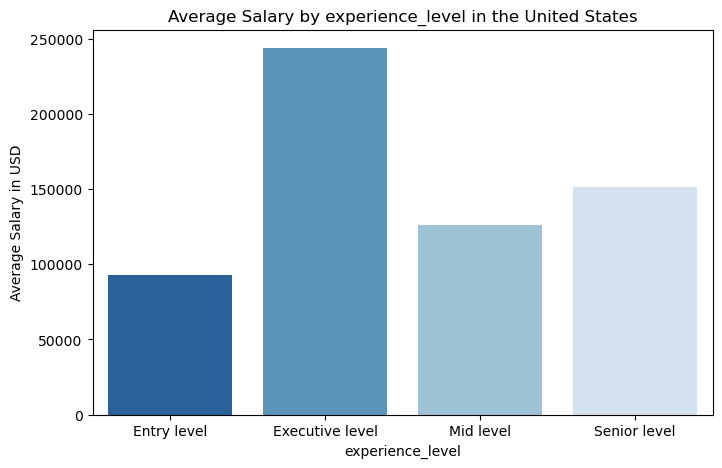

In [45]:
plot_avg_salary_us(US, 'experience_level')

The chart depicts the average salary by experience level in the United States. The Executive level has the highest average salary, folllowed by the Senior level, the Mid level and the Entry level has the least average salary.

### Average Salary based on Employement Type in the United States

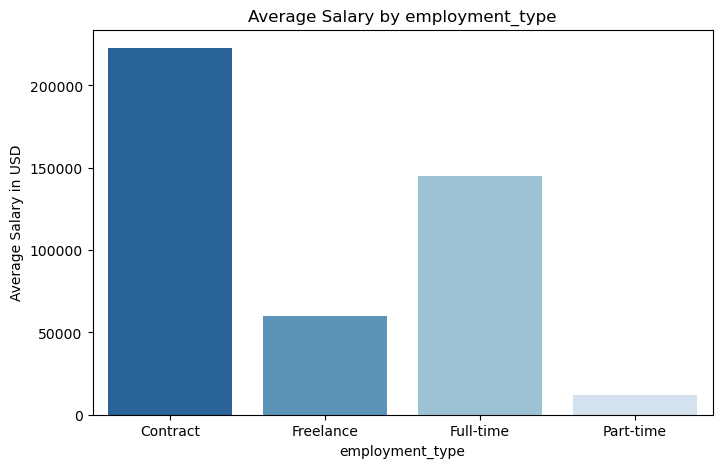

In [46]:
plot_avg_salary(US, 'employment_type')

The chart above shows the average salary by employment type in the United States. Contract earned the highest average salary, followed by Full-time and Freelance and Partitime having the lowest.

### Average Salary based on Remote Ratio in the United States

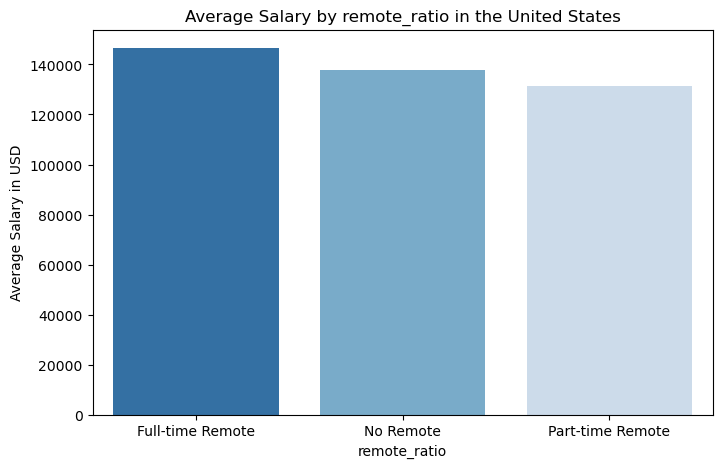

In [47]:
plot_avg_salary_us(US, 'remote_ratio')

The chart above shows average salary by remote ratio in the United States. There is no much difference in the average salaries but Full-time has the highest, followed by No Remmote and Part-time Remote havingbthe least average salaries.

### Average Salary by Company Size in the United States

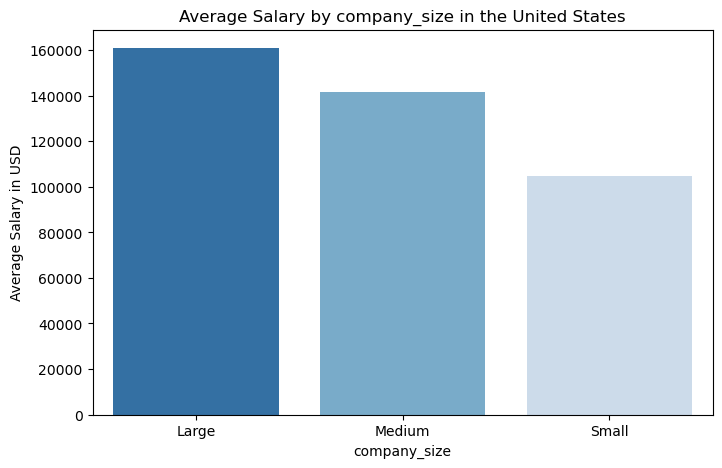

In [48]:
plot_avg_salary_us(US, 'company_size')

From the chart, the Large companies made more average salaries, the Medium coompanies made lesser than the Large companies and the Small companies made the least in the United States.

### Trend of salaries in the United States over the years

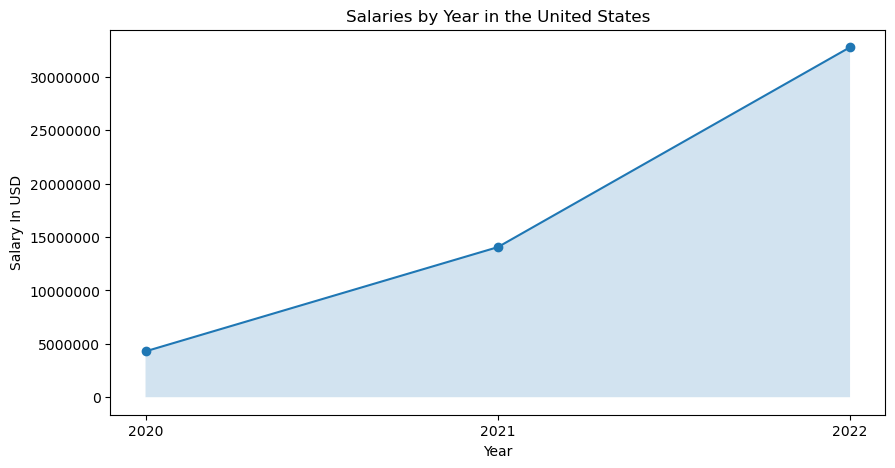

In [49]:
def plot_salary_by_year(df):
    salary_by_year = df.groupby('work_year')['salary_in_usd'].sum()
    years = df['work_year'].unique()
    plt.figure(figsize = (10,5))
    plt.fill_between(years, salary_by_year, alpha=0.2)
    plt.plot(years, salary_by_year, marker='o', label='salary_in_usd')
    plt.xlabel('Year')
    plt.ylabel('Salary In USD')
    plt.title('Salaries by Year in the United States')
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.show()

plot_salary_by_year(US)

The chart above depicts the trend of salaries by year in the United States. In 2020 to 2021, salaries increased from above USD 5,000,000 to above USD 10,000,000. From 2021 to 2022, salaries slowly decreases from above USD 10,000,000 to above USD 30,000,000.

## Focus on the other company locations

### Top 10 Popular Roles In Data Science In Other Countries

In [50]:
def plot_top_10_jobs_other(group_by_column, palette, title, data):
    top_10_jobs_other = Other['job_title'].value_counts().nlargest(10).reset_index()
    plt.figure(figsize=(10,6))
    sns.barplot(x='job_title', y='index', data=top_10_jobs_other, order=top_10_jobs_other.sort_values('job_title', ascending=False)['index'], palette=palette)
    plt.xticks(rotation=0)
    plt.title(title)
    for index, value in enumerate(top_10_jobs_other['job_title']):
        plt.text(value+1, index, str(value), color='black', fontweight='bold')
        sns.despine(left=True, bottom=True)
    plt.show()

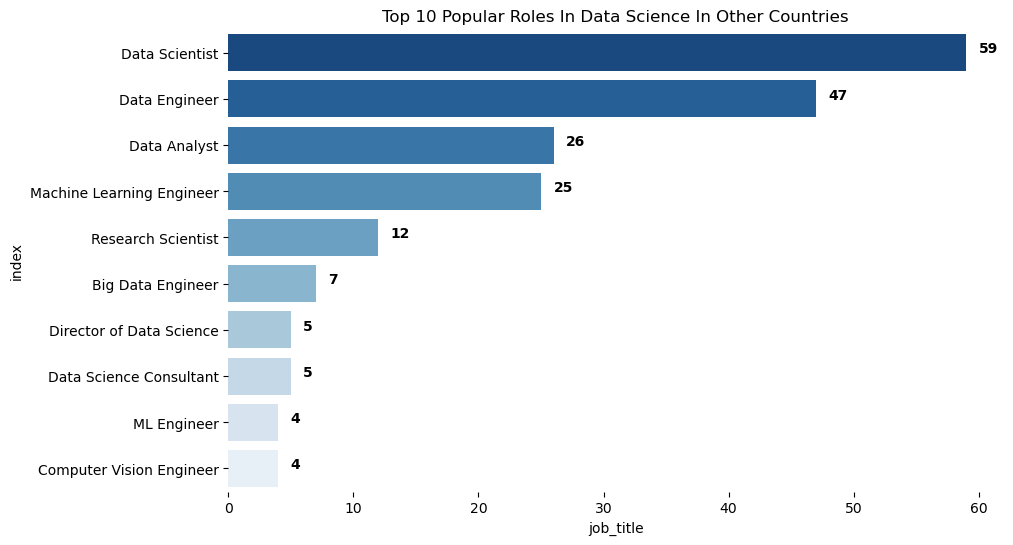

In [51]:
plot_top_10_jobs_other("job_title", "Blues_r", "Top 10 Popular Roles In Data Science In Other Countries", Other)

The chart above shows top 10 roles in other countries except the United States. The Data Scientist role tops when we focus on the other countries.The Data Engineer. Data Analyst, Machine Learning Engineer, Research Scientist and the other roles have a substantial popularity in the other countries.

### Average Salary In the Other Countries

In [52]:
def plot_avg_salary_other(df, groupby_column):
    exp = df.groupby(groupby_column).mean()['salary_in_usd'].reset_index()
    exp = exp.sort_values('salary_in_usd', ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=groupby_column, y='salary_in_usd', data=exp, palette='Blues_r')
    plt.xlabel(groupby_column)
    plt.ylabel('Average Salary in USD')
    plt.title('Average Salary by ' + groupby_column + ' in the Other Countries')
    plt.xticks(rotation=0)
    plt.show()

### Average Salary by Experience Level In the Other Countries

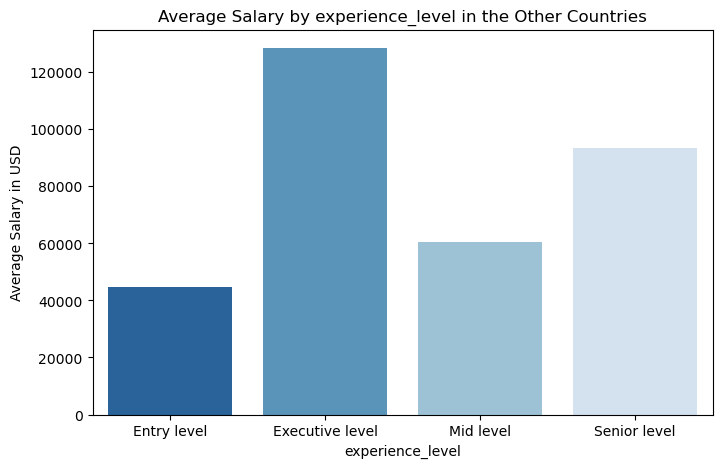

In [53]:
plot_avg_salary_other(Other, 'experience_level')

The chart depicts average salary based on experience level in other countries. In other countries, the Executive level has the highest average salary, followed by the Senior level, then the Mid level and the Entry level has the least average salary.

### Average Salary by Employment Type In the Other Countries

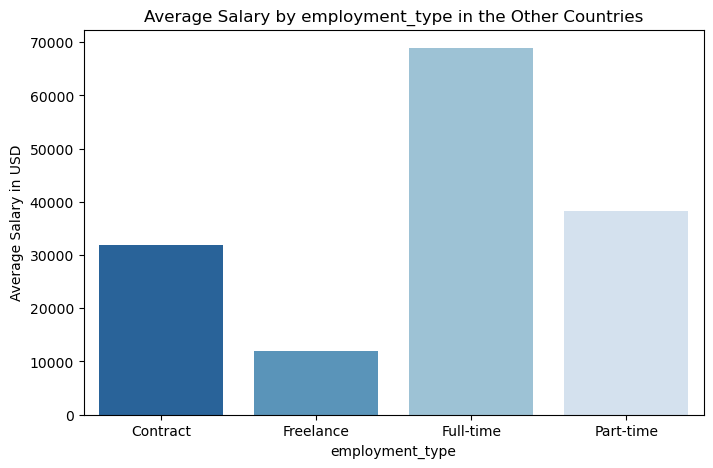

In [54]:
plot_avg_salary_other(Other, 'employment_type')

The chart above depicts average salary by employment type in the other countries. In other countries, Full-time makes the highest average salary, followed by Part-time, then Contract and Freelance having the least average salary.

### Average Salary by Remote Ratio In the Other Countries

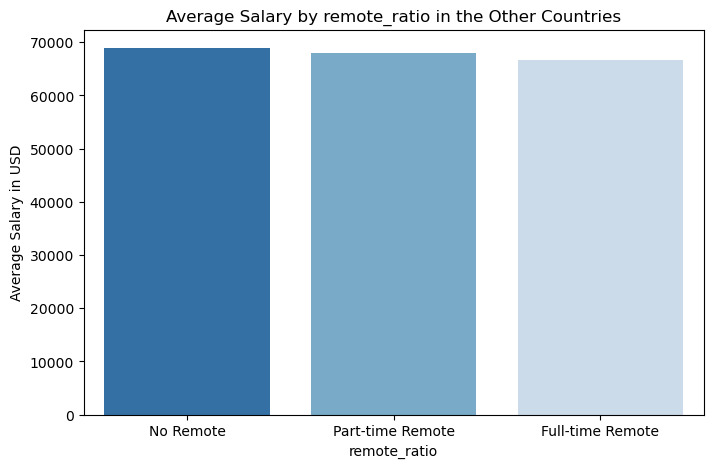

In [55]:
plot_avg_salary_other(Other, 'remote_ratio')

The chart shows the average salary by remote ratio in the other countries. In other countries, the difference between the remote ratio in the other countries are not huge but No Remote is higher, then Part-time Remote and then Full-time Remote.

### Average Salary by Company Size In the Other Countries

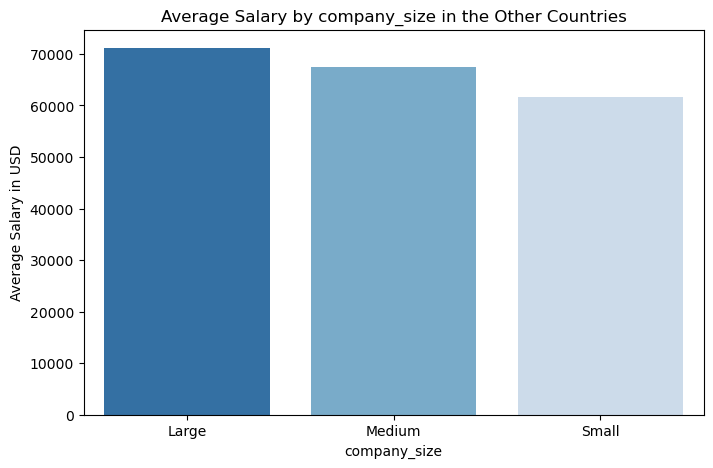

In [56]:
plot_avg_salary_other(Other, 'company_size')

From the chart, the Large companies made more average salaries, the Medium coompanies made lesser than the Large companies and the Small companies made the least in the other countries.

### Top 10 Data Science Roles by Average Salary In the Other Countries

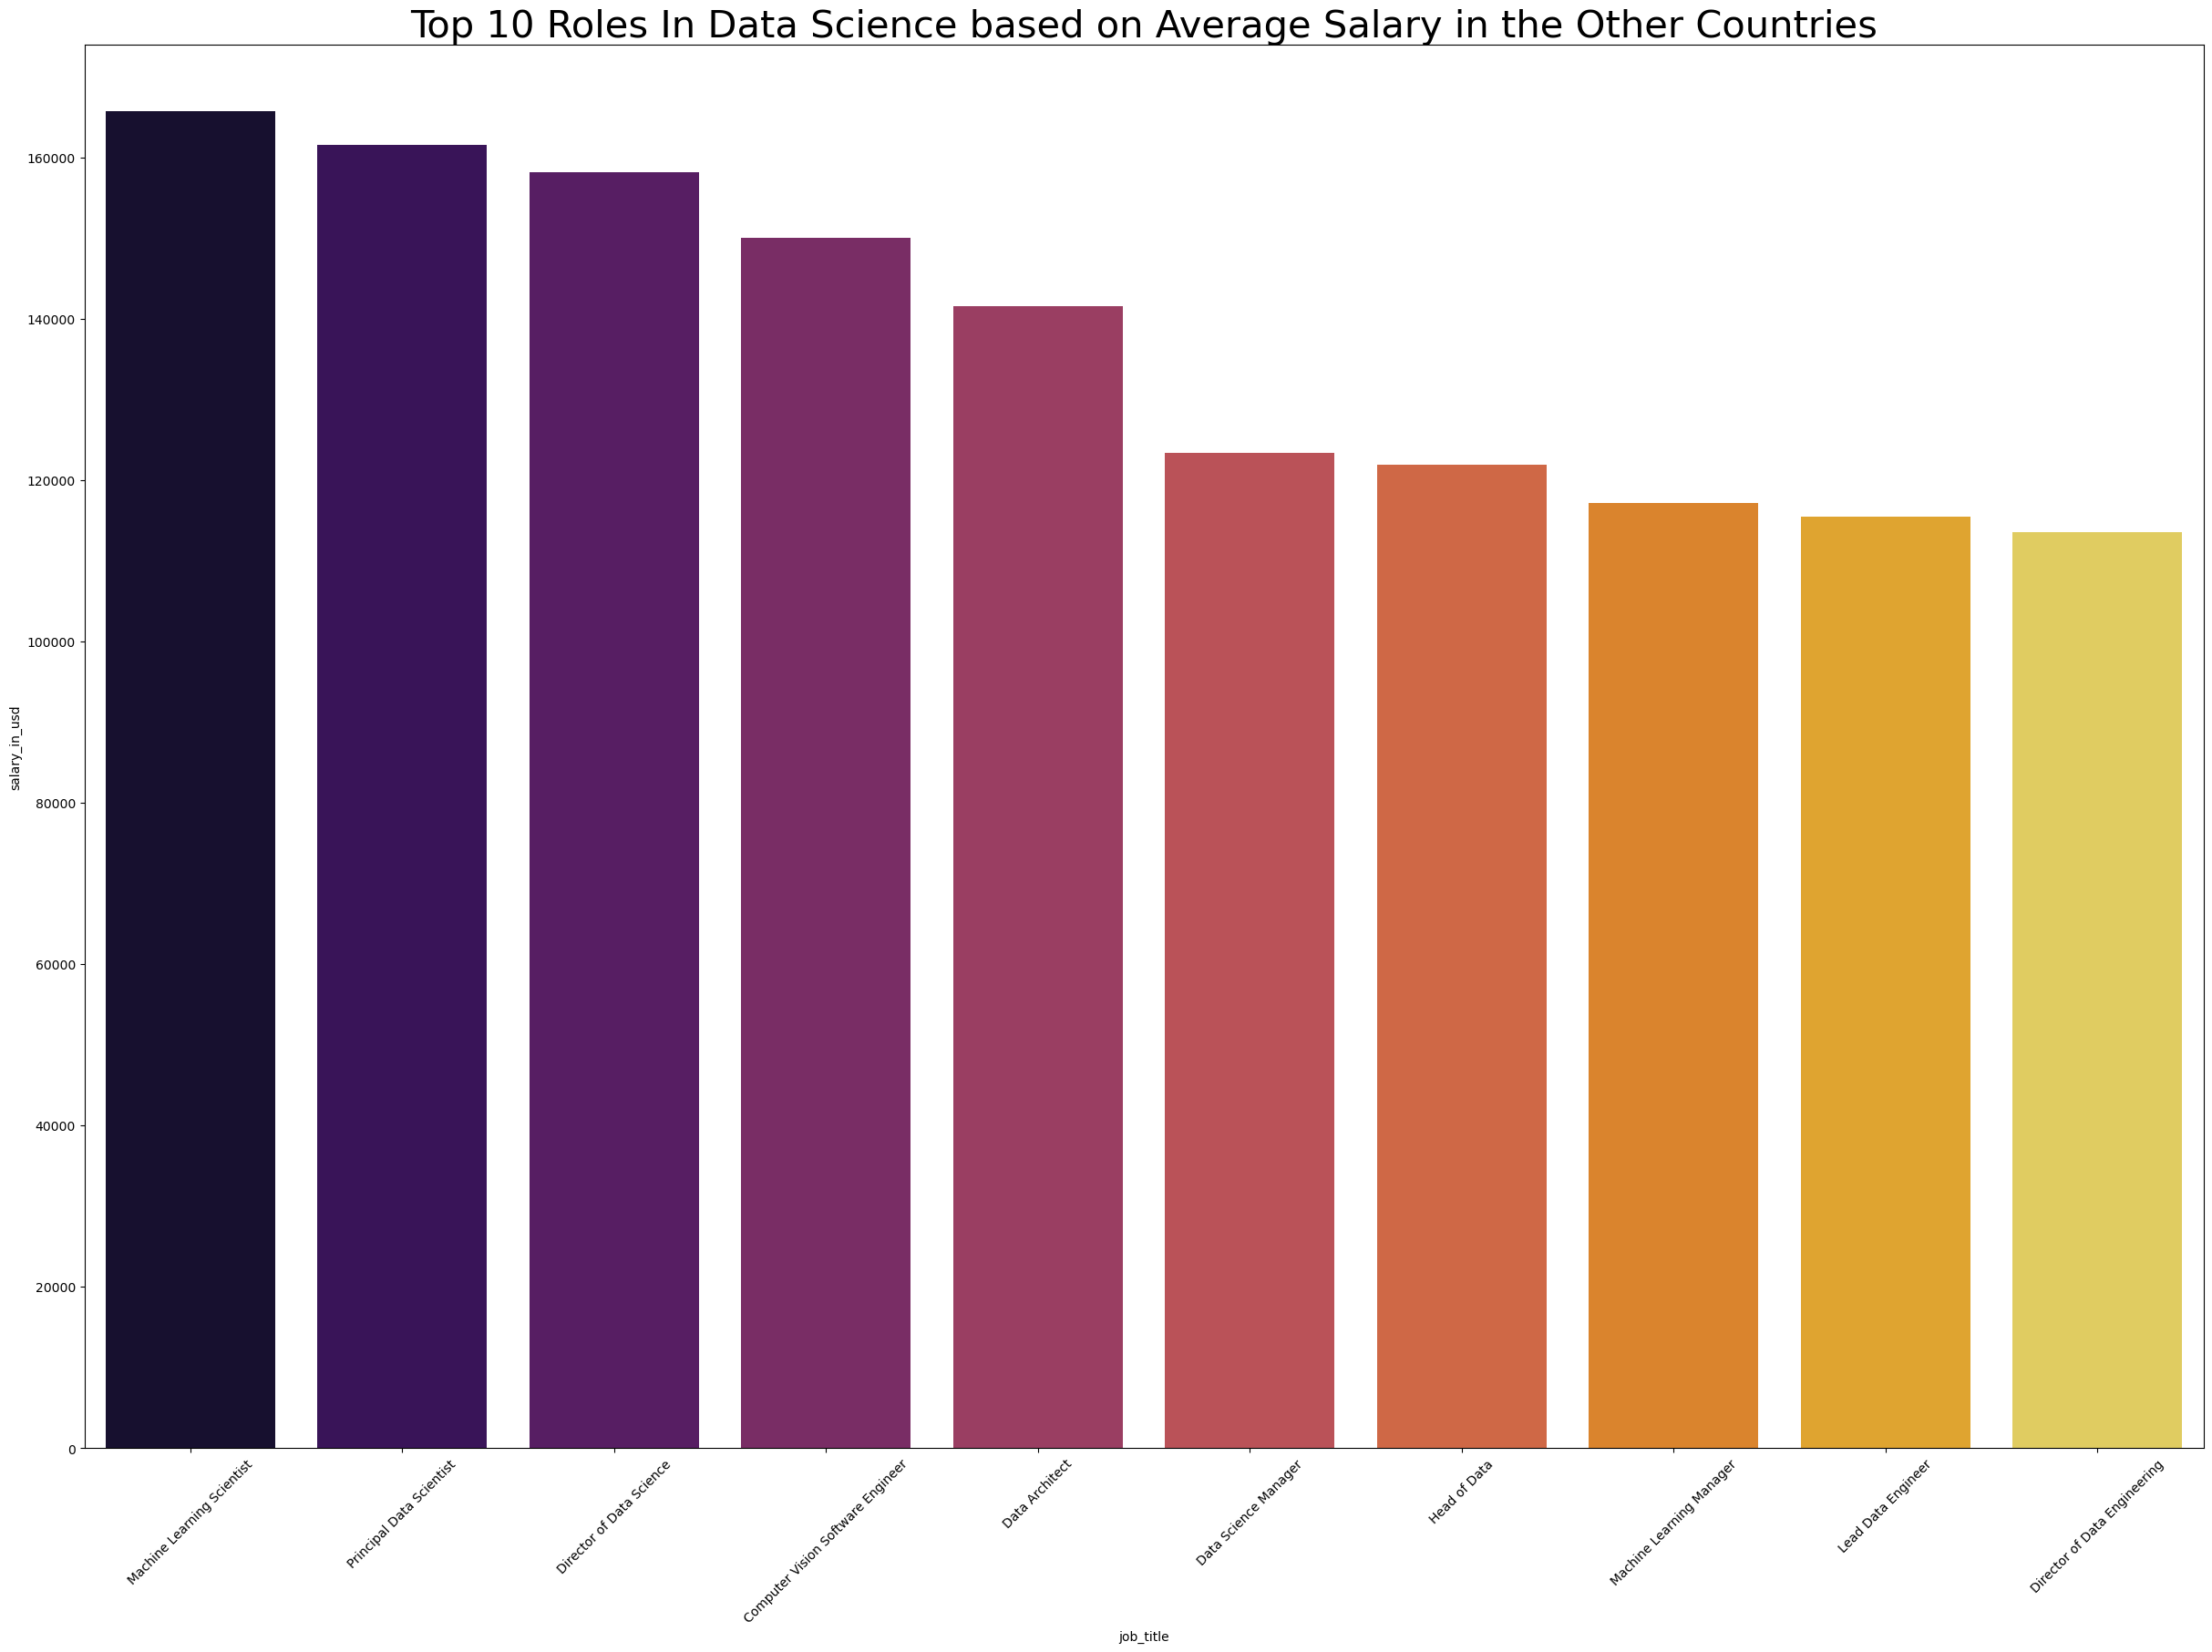

In [57]:
plot_top_10_salary("salary_in_usd", "job_title", "inferno", "Top 10 Roles In Data Science based on Average Salary in the Other Countries", Other)

The chart shows the top 10 roles in data science based on average salary. For the top 10 we have, Machine Learning Scientist, Principal Data Scientist, Director of Data Science, Computer Vision Software Engineer, Data Archirect and the rest in the chart above.

### Trend of salaries in Other Countries over the years

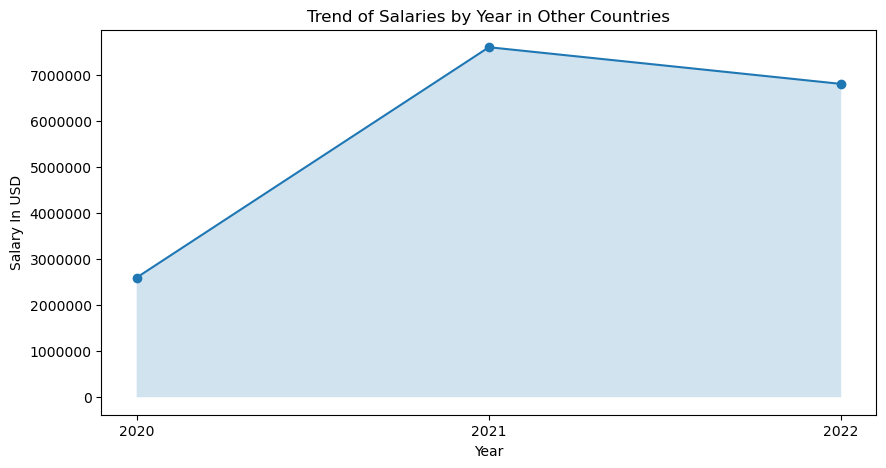

In [58]:
def plot_salary_by_year(df):
    salary_by_year = df.groupby('work_year')['salary_in_usd'].sum()
    years = df['work_year'].unique()
    plt.figure(figsize = (10,5))
    plt.fill_between(years, salary_by_year, alpha=0.2)
    plt.plot(years, salary_by_year, marker='o', label='salary_in_usd')
    plt.xlabel('Year')
    plt.ylabel('Salary In USD')
    plt.title('Trend of Salaries by Year in Other Countries')
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.show()

plot_salary_by_year(Other)

The chart above depicts the trend of salaries by year in other countries. In 2020 to 2021, salaries increased from above USD 2,000,000 to above USD 7,000,000. From 2021 to 2022, salaries slowly decreases from above USD 7,000,000 to above USD 6,000,000.

## Statistical Test

### Statistical test using ANOVA test

We wish to test if there is a significant difference in salary between the United States and the other countries.

- H0 (null hypothesis): μ1 = μ2 = μ3  (all the salary means are equal)


- H1 (alternative hypothesis): (all the salary means are not equal)

In [59]:
def one_way_anova(df, column_name, group_column_name):
    us_salary = df[df[group_column_name] == 'United States'][column_name]
    other_salary = df[df[group_column_name] != 'United States'][column_name]

    f_statistic, p_value = stats.f_oneway(us_salary, other_salary)

    print("One-way ANOVA Test Results:")
    print("F-Statistic:", f_statistic)
    print("P-Value:", p_value)

    return f_statistic, p_value

one_way_anova(df, 'salary_in_usd', 'company_location')

One-way ANOVA Test Results:
F-Statistic: 238.37491775877496
P-Value: 1.3906264944562379e-45


(238.37491775877496, 1.3906264944562379e-45)

Since this p-value is not less than 0.05, we fail to reject the null hypothesis.

The one-way ANOVA test conducted on the salary data from different company locations revealed a statistically significant difference between salaries in the United States and those in other countries. The F-statistic of 238.37 and a p-value of 1.39e-45 suggest that the observed difference is not due to chance and is likely caused by factors such as location, local economies, or other variables that affect salaries in different regions. Therefore, it can be concluded that there is a significant difference in salaries between the United States and other countries.

### Recommendations and  Conclusion

- From our analysis, the top paying roles are Data Analytics Lead and Principal Data Engineer. However, these are more senior roles.
- Although entry roles pay the least, getting these roles in US companies would be very rewarding. Remote working wouldn’t be a hinderance, but rather an advantage as from our analysis, 100% remote roles pay the best rates.
- Full-time roles and contract roles are the most profitable employment options.
- Large companies pay more than small companies naturally. However, small companies in the US pay far better than large companies in other parts of the world. Getting a role in a company in the US would be the best way to accelerate your career growth.
- Average pay is much higher in the US for the same position in other countries.

### Saving to a csv

In [60]:
data.to_csv('ds_salaries_cleaned.csv')